# __Unsupervised Learning__

- Dimensionality Reduction Techniques:
  - Check Linear Algebra notes (PCA and LDA)
  - t-Distributed Stochastic Neighbor Embedding (t-SNE)
- Association Rule Learning
  - Introduction to Association Rule Learning
  - Apriori Algorithm
- Anomaly Detection Techniques
  - Isolation forest

## __1. Dimensionality Reduction Techniques__

#### __Load the Diabetes dataset__

This dataset consists of 2000 samples with 8 features: preg, plas, pres, skin, insu, mass, pedi, and age. Each sample includes a target variable class, which indicates whether the sample tested positive or negative for a condition.

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Load the dataset
data = pd.read_csv('datasets/diabetes.csv')
data.head()

,preg,plas,pres,skin,insu,mass,pedi,age,class
0,6.0,159.1,67.5,27.0,408.6,57.0,0.642,36.0,tested_negative
1,14.0,170.3,111.6,30.0,758.4,65.6,1.157,53.0,tested_positive
2,10.0,139.3,88.5,83.5,831.3,46.2,1.204,23.0,tested_positive
3,7.0,150.6,24.8,49.6,337.6,29.0,1.391,43.0,tested_positive
4,6.0,102.2,116.4,51.8,351.5,60.4,1.993,31.0,tested_positive


In [3]:
# Split the dataset into features and target
X = data.drop(columns=['class'])
y = data['class'].apply(lambda x: 1 if x == 'tested_positive' else 0)

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [5]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### __1.1 Principal Component Analysis (PCA)__

#### __Apply the PCA (without reducing components)__

- Import PCA from sklearn.decomposition.
- Instantiate a PCA object without specifying any dimensions - in order to find the optimal number of components.
- Find the optimal number of principal components.
- Instantiate a PCA object with the optimal number of components (*to be done in a later step*).
- Fit PCA to the scaled data.
- Transform the scaled data using PCA.

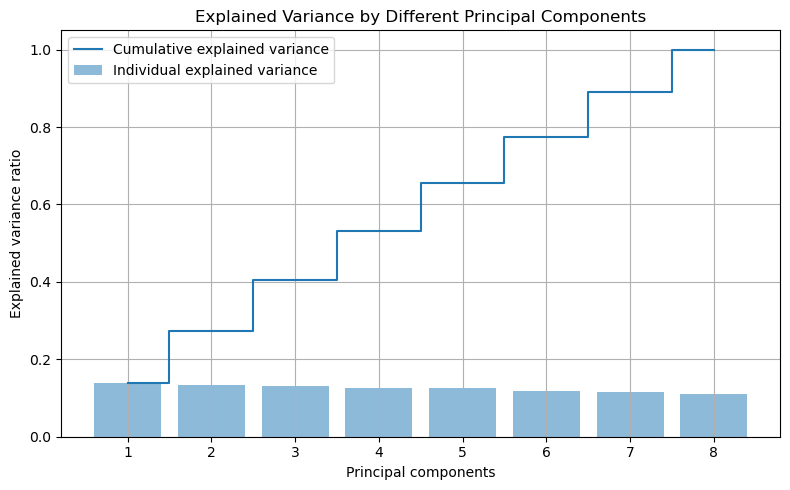

In [6]:
# Apply PCA without reducing dimensionality to find the optimal number of components
pca = PCA()
pca.fit(X_train_scaled)

# Explained variance ratios
explained_variance = pca.explained_variance_ratio_

plt.figure(figsize=(8, 5))
plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.5, align='center',
        label='Individual explained variance')
plt.step(range(1, len(explained_variance) + 1), np.cumsum(explained_variance), where='mid',
         label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.title('Explained Variance by Different Principal Components')
plt.legend(loc='best')
plt.tight_layout()
plt.grid(True)
plt.show()

##### __Observation:__

The plot shows that each of the 8 principal components explains a similar amount of variance individually, while the cumulative explained variance steadily increases, approaching 100% by the 8th component.
- Here, we can see that almost 6 or 7 principal components are needed to reach 80-90% threshold.

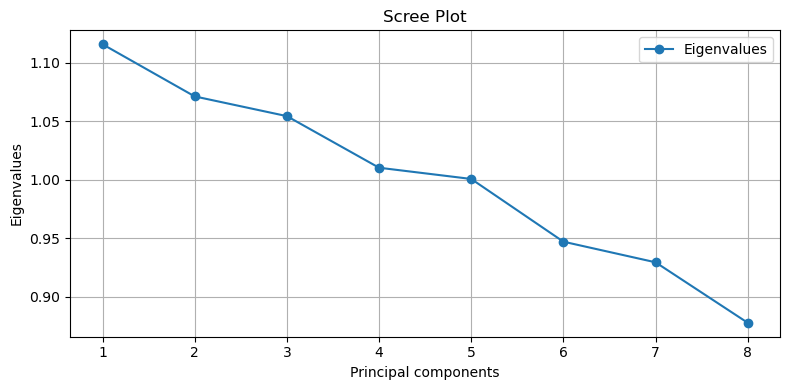

In [7]:
# Eigenvalues (which are proportional to the explained variance)
eigenvalues = pca.explained_variance_

# Scree plot
plt.figure(figsize=(8, 4))
plt.plot(range(1, len(eigenvalues) + 1), eigenvalues, marker='o', linestyle='-', label='Eigenvalues')
plt.xlabel('Principal components')
plt.ylabel('Eigenvalues')
plt.title('Scree Plot')
plt.legend(loc='best')
plt.tight_layout()
plt.grid(True)
plt.show()

##### __Observation:__

The scree plot shows the eigenvalues, representing the explained variance ratio, for each of the eight principal components. 
- The eigenvalues decrease sharply from the 1st to the 2nd principal component, continue to decline at a slower rate up to the 3rd component, and then begin to level off from the 4th component onwards.
- This pattern indicates that the first few components capture most of the variance in the data, with diminishing returns for each additional component beyond the 3rd or 4th. T
- Thus, the plot suggests that the optimal number of principal components is around 6 or 7 for 80% threshold.

#### __Apply the PCA (with 3 components)__

- Here, we have considered 3 components in order to visualize using the 3D scatter plot.

In [8]:
pca = PCA(n_components=3)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

In [9]:
df_train_pca = pd.DataFrame(data=X_train_pca, columns=['Principal Component 1', 'Principal Component 2', 'Principal Component 3'])
df_train_pca['Target'] = y_train

df_test_pca = pd.DataFrame(data=X_test_pca, columns=['Principal Component 1', 'Principal Component 2', 'Principal Component 3'])
df_test_pca['Target'] = y_test

#### __Visualize the results for training and testing set.__

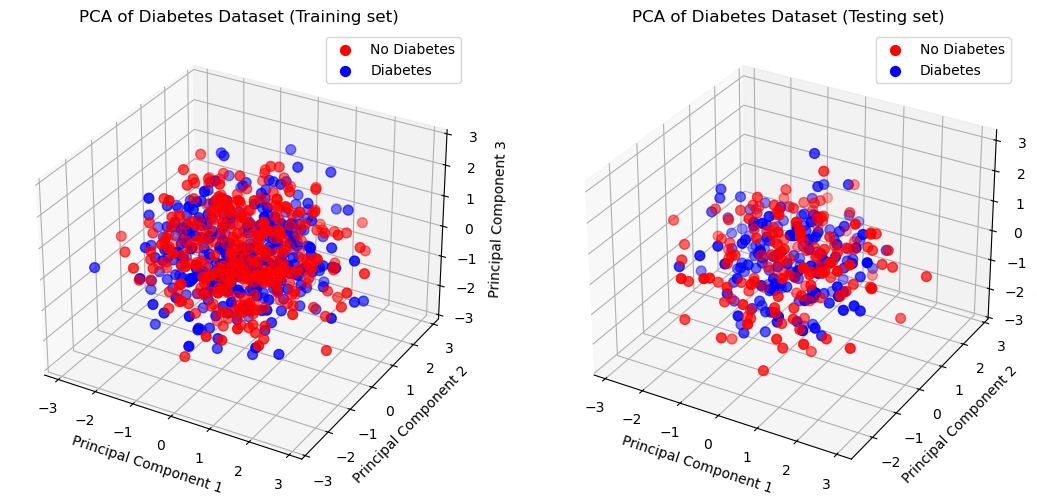

In [11]:
# Plotting the 3D scatter plot
fig = plt.figure(figsize=(13, 8))

# Training set
ax1 = fig.add_subplot(121, projection='3d')
colors = ['r', 'b']
for target, color in zip([0, 1], colors):
    indices = df_train_pca['Target'] == target
    ax1.scatter(df_train_pca.loc[indices, 'Principal Component 1'],
                df_train_pca.loc[indices, 'Principal Component 2'],
                df_train_pca.loc[indices, 'Principal Component 3'],
                c=color,
                s=50)

ax1.set_xlabel('Principal Component 1')
ax1.set_ylabel('Principal Component 2')
ax1.set_zlabel('Principal Component 3')
ax1.legend(['No Diabetes', 'Diabetes'])
ax1.set_title('PCA of Diabetes Dataset (Training set)')
ax1.grid()

# Testing set
ax2 = fig.add_subplot(122, projection='3d')
for target, color in zip([0, 1], colors):
    indices = df_test_pca['Target'] == target
    ax2.scatter(df_test_pca.loc[indices, 'Principal Component 1'],
                df_test_pca.loc[indices, 'Principal Component 2'],
                df_test_pca.loc[indices, 'Principal Component 3'],
                c=color, 
                s=50)

ax2.set_xlabel('Principal Component 1')
ax2.set_ylabel('Principal Component 2')
ax2.set_zlabel('Principal Component 3')
ax2.legend(['No Diabetes', 'Diabetes'])
ax2.set_title('PCA of Diabetes Dataset (Testing set)')
ax2.grid()

plt.show()

### __1.2 Linear Discriminant Analysis (LDA)__


- Import LDA from sklearn.decomposition.
- Instantiate a LDA object with one components.
- Fit LDA to the scaled data.
- Transform the scaled data using LDA.


In [12]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

In [13]:
lda = LDA(n_components=1)
X_train_lda = lda.fit_transform(X_train_scaled, y_train)
X_test_lda = lda.transform(X_test_scaled)

In [14]:
df_train_lda = pd.DataFrame(data=X_train_lda, columns=['LDA Component 1'])
df_train_lda['Target'] = y_train

df_test_lda = pd.DataFrame(data=X_test_lda, columns=['LDA Component 1'])
df_test_lda['Target'] = y_test

#### __Visualize the results for training and testing set.__

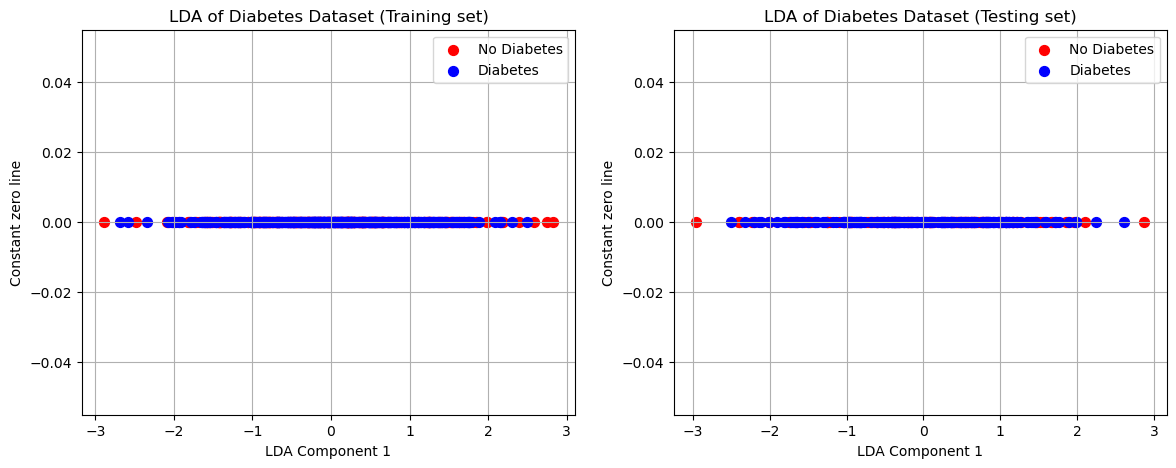

In [15]:
import numpy as np
import matplotlib.pyplot as plt
plt.figure(figsize=(14, 5))

# Training set
plt.subplot(1, 2, 1)
colors = ['r', 'b']
for target, color in zip([0, 1], colors):
    indices = df_train_lda['Target'] == target
    plt.scatter(df_train_lda.loc[indices, 'LDA Component 1'], 
                np.zeros_like(df_train_lda.loc[indices, 'LDA Component 1']),
                c=color,
                s=50)
    
plt.xlabel('LDA Component 1')
plt.ylabel('Constant zero line')
plt.legend(['No Diabetes', 'Diabetes'])
plt.title('LDA of Diabetes Dataset (Training set)')
plt.grid()

# Testing set
plt.subplot(1, 2, 2)
for target, color in zip([0, 1], colors):
    indices = df_test_lda['Target'] == target
    plt.scatter(df_test_lda.loc[indices, 'LDA Component 1'], 
                np.zeros_like(df_test_lda.loc[indices, 'LDA Component 1']),
                c=color,
                s=50)

plt.xlabel('LDA Component 1')
plt.ylabel('Constant zero line')
plt.legend(['No Diabetes', 'Diabetes'])
plt.title('LDA of Diabetes Dataset (Testing set)')
plt.grid()

plt.show()


**Observation**

In both plots, the LDA component is plotted along the x-axis. The points are colored according to their target labels: red for non diabetes and blue for diabetes. The zero y-values are used to clearly separate the data points for visualization purposes.

### __1.3 t-Distributed Stochastic Neighbor Embedding (t-SNE)__

t-Distributed Stochastic Neighbor Embedding (t-SNE) is a dimensionality reduction algorithm that uses a randomized approach to non-linearly reduce the dimensionality of a dataset. It focuses on retaining the local structure of the data in the lower-dimensional space.

This algorithm helps explore high-dimensional data by mapping it into lower dimensions while preserving local relationships. As a result, we can visualize and understand the structure of the dataset by plotting it in 2D or 3D.

#### **Applying t-SNE**


- `TSNE` from `sklearn.manifold` is used to reduce the data to 2 dimensions for visualization.
- Only a subset of 1000 samples is used for performance reasons (t-SNE can be computationally intensive).

**Note:** Dataset without train test split is taken to fit the model since this is only for visualization purpose.

## __2. Association Rule Learning__

### __6.4.1 Introduction to Association Rule Learning__

Association Rule Learning is a popular unsupervised learning technique used to uncover relationships, patterns, or associations among a set of items in large datasets. This technique is commonly used in market basket analysis, where the goal is to identify sets of products that frequently co-occur in transactions.

The two key concepts in association rule learning are **frequent itemsets** and **association rules**.

**Frequent Itemsets:**

- These are groups of items that appear frequently together in transactions.
- The frequency is measured by the support count, which is the number of transactions containing the itemset.

**Association Rules:**

These are implications of the form $ { 𝐴, 𝐵} → { 𝐶 } $, meaning that if items A and B are bought, then item C is likely to be bought.

Rules are evaluated based on their support, confidence, and lift:
- Support: The proportion of transactions that contain the itemset or how frequently an item appears in the dataset.
$$ \text{Supp}(X) = \frac{\text{Freq}(X)}{T}$$

- Confidence: The probability that a transaction containing the antecedent also contains the consequent or how often the rule has been found to be true.
$$ \text{Confidence} = \frac{\text{Freq}(X, Y)}{\text{Freq}(X)}$$

- Lift: The ratio of the observed support to that expected if the items were independent. A lift greater than 1 indicates a positive association.
$$ \text{Lift} = \frac{\text{Supp}(X, Y)}{\text{Supp}(X) \times \text{Supp}(Y)}$$

![link text](https://labcontent.simplicdn.net/data-content/content-assets/Data_and_AI/ML/New/Lesson_06_Unsupervised_Learning/association.png)

#### __Practical Applications:__
1. **Market Basket Analysis:** Identifying products that are frequently bought together to optimize product placement and promotions.
2. **Web Usage Mining:** Analyzing user navigation patterns to improve website design and content recommendation.
3. **Bioinformatics:** Discovering relationships between genes and proteins.
4. **Fraud Detection:** Identifying patterns in fraudulent transactions.

#### __Popular Algorithms:__

**Apriori Algorithm:**
- It uses breadth-first search and Hash Tree to calculate the itemset efficiently.
- Generates frequent itemsets by iteratively expanding smaller itemsets.
- Uses the _Apriori Property_ which states that all non-empty subsets of a frequent itemset must also be frequent.

### __6.4.2 Apriori Algorithm__

The Apriori algorithm is a classic algorithm used for mining frequent itemsets and learning association rules over transactional databases. It is an unsupervised learning technique, typically used in market basket analysis to find interesting relationships between items in large datasets.

The algorithm operates by identifying the frequent individual items in the database and extending them to larger itemsets as long as those itemsets appear sufficiently often in the database.

Let's implement Apriori Algorithm

**Data Loading and Preparation:**

- The dataset was loaded into a pandas DataFrame from a CSV file named `Market_Basket_Optimisation.csv`.
- Each transaction (row) in the dataset represents a set of items purchased together.
- We converted this DataFrame into a list of lists, where each inner list contains the items of a single transaction.

In [ ]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder

# Load the dataset
data = pd.read_csv('Market_Basket_Optimisation.csv', header=None)

# Convert the DataFrame to a list of lists
transactions = []
for i in range(data.shape[0]):
    transactions.append([str(data.values[i, j]) for j in range(data.shape[1]) if str(data.values[i, j]) != 'nan'])


**Transaction Encoding:**

- We used the `TransactionEncoder` from the `mlxtend.preprocessing` module to convert the list of lists into a one-hot encoded DataFrame. In this format, each column represents an item, and each row represents a transaction, with binary values indicating whether an item was purchased in that transaction.

In [ ]:
# Initialize the TransactionEncoder
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df = pd.DataFrame(te_ary, columns=te.columns_)

**Display the first 5 rows of the dataset.**

In [ ]:
# Display the first few rows of the one-hot encoded DataFrame
print(df.head())

    asparagus  almonds  antioxydant juice  asparagus  avocado  babies food  \
0       False     True               True      False     True        False   
1       False    False              False      False    False        False   
2       False    False              False      False    False        False   
3       False    False              False      False     True        False   
4       False    False              False      False    False        False   

   bacon  barbecue sauce  black tea  blueberries  ...  turkey  vegetables mix  \
0  False           False      False        False  ...   False            True   
1  False           False      False        False  ...   False           False   
2  False           False      False        False  ...   False           False   
3  False           False      False        False  ...    True           False   
4  False           False      False        False  ...   False           False   

   water spray  white wine  whole weat flour

**Applying the Apriori Algorithm:**

- The `apriori` function from the `mlxtend.frequent_patterns` module was used to find frequent itemsets. We specified a minimum support threshold of 0.01 (1%), meaning that an itemset must appear in at least 1% of transactions to be considered frequent.
- The result is a DataFrame where each row represents a frequent itemset, and the columns provide the support (proportion of transactions containing the itemset) and the itemsets themselves.

In [ ]:
from mlxtend.frequent_patterns import apriori, association_rules

# Apply the Apriori algorithm with a minimum support of 0.01 (1%)
frequent_itemsets = apriori(df, min_support=0.01, use_colnames=True)



In [ ]:
frequent_itemsets.head(5)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,support,itemsets
0,0.020397,(almonds)
1,0.033329,(avocado)
2,0.010799,(barbecue sauce)
3,0.014265,(black tea)
4,0.011465,(body spray)


**Generating Association Rules:**

- The `association_rules` function was used to generate association rules from the frequent itemsets. We specified a minimum confidence threshold of 0.2 (20%), meaning that the rules must have a confidence of at least 20% to be considered.
- The result is a DataFrame where each row represents an association rule, and the columns provide various metrics related to the rule.

In [ ]:
# Generate the association rules with a minimum confidence of 0.2 (20%)
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.2)

# Display the results
print("Frequent Itemsets:")
print(frequent_itemsets.head())
print("\nAssociation Rules:")
print(rules.head())

Frequent Itemsets:
    support          itemsets
0  0.020397         (almonds)
1  0.033329         (avocado)
2  0.010799  (barbecue sauce)
3  0.014265       (black tea)
4  0.011465      (body spray)

Association Rules:
  antecedents      consequents  antecedent support  consequent support  \
0   (avocado)  (mineral water)            0.033329            0.238368   
1   (burgers)           (eggs)            0.087188            0.179709   
2   (burgers)   (french fries)            0.087188            0.170911   
3   (burgers)      (green tea)            0.087188            0.132116   
4   (burgers)           (milk)            0.087188            0.129583   

    support  confidence      lift  leverage  conviction  zhangs_metric  
0  0.011598    0.348000  1.459926  0.003654    1.168147       0.325896  
1  0.028796    0.330275  1.837830  0.013128    1.224818       0.499424  
2  0.021997    0.252294  1.476173  0.007096    1.108844       0.353384  
3  0.017464    0.200306  1.516139  0.005945 

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


**Observations**
- **support:** This column shows the proportion of transactions that contain the itemset. For example, 0.020397 means that almonds appear in approximately 2.04% of transactions.
- **itemsets:** This column lists the items in the frequent itemset. For example, (almonds) means that the itemset contains only almonds.

- **antecedents:** Items on the left-hand side of the rule (e.g., `avocado`).
- **consequents:** Items on the right-hand side of the rule (e.g., `mineral water`).
- **antecedent support:** Proportion of transactions that contain the antecedent itemset.
- **consequent support:** Proportion of transactions that contain the consequent itemset.


- **support:** Proportion of transactions that contain both the antecedent and consequent itemsets.
- **confidence:** Proportion of transactions containing the antecedent that also contain the consequent (calculated as `support / antecedent support`).
- **lift:** Ratio of the observed support to that expected if the antecedent and consequent were independent (calculated as `confidence / consequent support`).
- **leverage:** Difference between the observed support and the support expected if the antecedent and consequent were independent.
- **conviction:** Measure of the implication strength of the rule (calculated as `(1 - consequent support) / (1 - confidence)`).
- **zhangs_metric:** A measure of the strength of the association rule, balancing confidence and lift.

## __6.5 Anomaly Detection Techniques__

Anomaly detection is a technique used to identify rare items, events, or outliers that differ significantly from the majority of the data. In unsupervised learning, anomaly detection is particularly challenging because there are no labeled examples of anomalies to guide the learning process.

### __6.5.1 Isolation forest__

Isolation Forest is an unsupervised learning algorithm for anomaly detection that works by isolating observations by randomly selecting a feature and then randomly selecting a split value between the maximum and minimum values of the selected feature. The key idea is that anomalies are few and different, so they are more susceptible to isolation.

- **Unique Approach:** Isolation Forest does not rely on proximity measures like traditional methods.
- **Random Feature Selection:** It randomly selects features and splits them at random values.
- **Isolation Process:** This process creates partitions or "trees" to isolate individual data points.
- **Anomaly Detection:** Anomalies, being fewer and further from the norm, typically require fewer splits to isolate.
- **Efficiency:** This makes anomalies easier and faster to detect compared to normal observations.

Let's implement the Isolation Forest to detect anamolies.

In [ ]:
import pandas as pd
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Load the dataset
file_path = 'credit_card_fraud.csv'  # Update the path to your file
df = pd.read_csv(file_path)

# Display the first few rows of the dataset
print(df.head())

         V1        V2        V3        V4        V5      Amount  Class
0  0.543360 -0.193659  0.968185 -0.213457  0.285803   55.271583    0.0
1  0.982691  0.808058  0.885231  1.352203  1.272570   39.268121    0.0
2 -1.840874 -0.223466  1.954157 -1.435910 -0.992866  275.345272    0.0
3 -0.573662  0.579633  1.809306  0.596441 -0.453636  405.983871    0.0
4 -1.124642  0.536653 -0.929511  1.190549 -0.546042  108.890401    0.0


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Features for training
features = ['V1', 'V2', 'V3', 'V4', 'V5', 'Amount']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df[features], df['Class'], test_size=0.2, random_state=42)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


**Fit the Isolation Forest Model:**

- IsolationForest is fit on the X_train data.


- Predictions and anomaly scores for `X_train` and `X_test` are stored in separate variables (`train_anomaly_predictions`, `train_anomaly_scores`, `test_anomaly_predictions`, `test_anomaly_scores`).

In [ ]:
print("Training features:", X_train.columns)
print("Testing features:", X_test.columns)

Training features: Index(['V1', 'V2', 'V3', 'V4', 'V5', 'Amount'], dtype='object')
Testing features: Index(['V1', 'V2', 'V3', 'V4', 'V5', 'Amount'], dtype='object')


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Fit the Isolation Forest model
iso_forest = IsolationForest(contamination=0.01, random_state=42)
iso_forest.fit(X_train)


# Predict anomalies (-1 for anomalies, 1 for normal points) on the training set
train_anomaly_predictions = iso_forest.predict(X_train)
train_anomaly_scores = iso_forest.decision_function(X_train)

# Predict anomalies on the test set
test_anomaly_predictions = iso_forest.predict(X_test)
test_anomaly_scores = iso_forest.decision_function(X_test)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


In [ ]:
# Add predictions and scores to the test set
X_test['Anomaly'] = test_anomaly_predictions
X_test['Anomaly Score'] = test_anomaly_scores

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


**Evaluation and Plotting:**

- The number of anomalies detected in the test set is printed.
- A scatter plot is created to visualize the anomaly scores against the transaction amounts.

In [ ]:
# Evaluate the results on the test set
print(X_test['Anomaly'].value_counts())

Anomaly
 1    197
-1      3
Name: count, dtype: int64


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


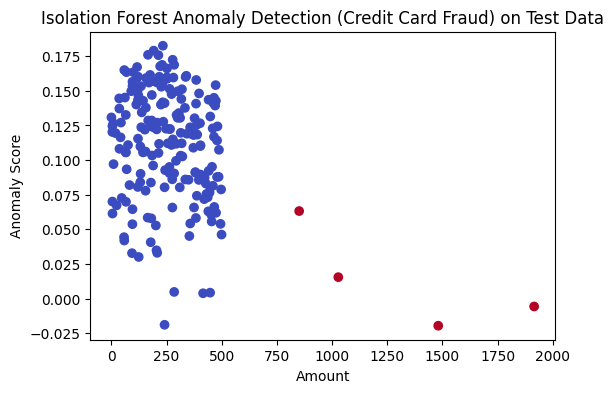

In [ ]:
# Plot the results for the test set
plt.figure(figsize=(6, 4))
plt.scatter(X_test['Amount'], X_test['Anomaly Score'], c=y_test, cmap='coolwarm')
plt.xlabel('Amount')
plt.ylabel('Anomaly Score')
plt.title('Isolation Forest Anomaly Detection (Credit Card Fraud) on Test Data')
plt.show()

**Observation:**

1. **Anomaly Scores and Detection:**

  - The anomaly scores range from approximately -0.025 to 0.175.
The model detected 4 anomalies, with transaction amounts around 750, 1000, 1500, and 2000 (all the values are in $).

2. **Transaction Amount Distribution:**

  - Normal transactions are predominantly below $500, totaling 194 instances.
Higher transaction amounts are more likely to be flagged as anomalies, indicating effective detection of outliers.

##__Conclusion__##


In conclusion, unsupervised learning techniques are powerful tools for exploring and extracting meaningful insights from unlabeled data. By allowing algorithms to autonomously identify patterns and structures within datasets, you can uncover hidden relationships, detect anomalies, and gain a deeper understanding of the underlying data distribution. From clustering and dimensionality reduction to association rule learning, the applications of unsupervised learning are vast and diverse, spanning fields such as data analysis, pattern recognition, and anomaly detection.